In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
directoryH = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220717_H_M_L_Force/data/High force raspberry/TPU/Reference'
directoryM = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220717_H_M_L_Force/data/Medium force raspberry/TPU/Reference'
directoryL = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220717_H_M_L_Force/data/Low force raspberry/TPU/Reference'

dirs = [directoryL,directoryM,directoryH]
lvls = ['L','M','H']

In [3]:
for lvl, dir in enumerate(dirs):
    human_trials_r = []
    human_trials_l = []
    all_times = []
    for i in range(1,6):
        # for i, trial in enumerate(os.listdir(directory))
        file_name = dir+'/human trial'+str(i)+'.txt'
        with open(file_name, 'r+') as f:
            trial_r = []
            trial_l = []
            time = []
            i = 0
            while True:
                line = f.readline()
                if not line:
                    break
                if i > 3:
                    if float(line[6:14]) > 0.6:
                        time.append(float(line[6:14]))
                        trial_r.append(float(line[15:35]))
                        trial_l.append(float(line[36::]))
                i += 1
        all_times.append(time)
        human_trials_r.append(trial_r)
        human_trials_l.append(trial_l)

    locals()['all_times'+lvls[lvl]] = all_times
    locals()['rasp'+lvls[lvl]] = human_trials_r
    locals()['loadcell'+lvls[lvl]] = human_trials_l

all_times=[]
all_times = [all_timesL, all_timesM, all_timesH]
all_rasps = [raspL, raspM, raspH]
all_loadcell = [loadcellL, loadcellM, loadcellH]



## Aligning with when the raspberry is off the stem 

In [4]:
all_lengths = []
all_offstem = []
for human_trials in all_rasps:
    lengths = []
    off_stem = []
    for trial in human_trials:
        lengths.append(len(trial))
        dif = []
        for i,value in enumerate(trial):
            if i > 0:
                dif.append(value - trial[i-1])
        off_stem.append(dif.index(min(dif)))
    all_lengths.append(lengths)
    all_offstem.append(off_stem)

all_beginpull = []
for human_trials_l in all_loadcell:
    begin_pull = []
    for trial in human_trials_l:
        dif = []
        for i,value in enumerate(trial):
            if i > 0:
                dif.append(value - trial[i-1])
        begin_pull.append([dif.index(max(dif))-1,dif.index(min(dif))+1])
    all_beginpull.append(begin_pull)

In [5]:
all_beginpull2 = []
for human_trials_l in all_loadcell:
    begin_pull2 = []
    for trial in human_trials_l:
        pull = [0, 0]
        flag = False
        for i,value in enumerate(trial):
            if value > 50 and not flag:
                pull[0] = i-1
                flag = True
            elif value < 50 and flag:
                pull[1] = i+1
                break
        begin_pull2.append(pull)
    all_beginpull2.append(begin_pull)

In [6]:
max_val = max(off_stem)
all_new_rasp = []
all_new_loadcell = []
for j, human_trials in enumerate(all_rasps):
    max_val = max(all_offstem[j])
    new_human_trials = []
    new_trials_loadcell = []
    for i, trial in enumerate(human_trials):
        if i != all_offstem[j].index(max_val):
            extra = np.array([0]*(max_val-all_offstem[j][i]))
            new_human_trials.append(np.append(extra, trial))
            new_trials_loadcell.append(np.append(extra, all_loadcell[j][i]))
    all_new_rasp.append(new_human_trials)
    all_new_loadcell.append(new_trials_loadcell)

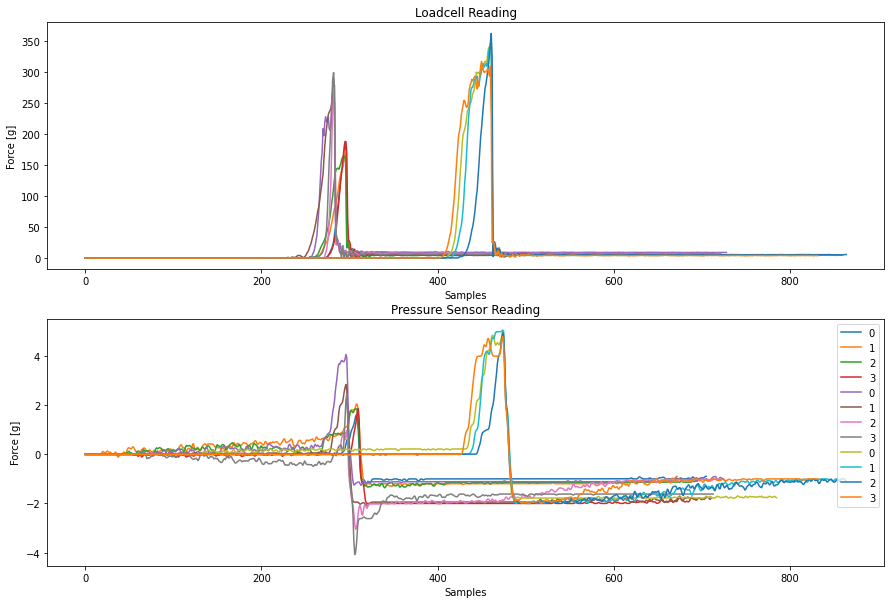

In [7]:
minimum = 0
saved = 0
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(15,10)
for j, new_human_trials in enumerate(all_new_rasp):
    for i, trial in enumerate(new_human_trials):
        axs[1].plot(range(len(trial)), trial, label=str(i))
        axs[1].set_ylabel("Force [g]")
        axs[1].set_xlabel("Samples")
        axs[1].set_title("Pressure Sensor Reading")
        axs[1].legend(loc="upper right")

        axs[0].plot(range(len(all_new_loadcell[j][i])), all_new_loadcell[j][i])
        axs[0].set_ylabel("Force [g]")
        axs[0].set_xlabel("Samples")
        axs[0].set_title("Loadcell Reading")
        newminimum = trial[-1]
        if newminimum < minimum:
            saved = i
            minimum = newminimum

In [8]:
all_longest = []
longest_lengths = []
for j, picking_trials in enumerate(all_new_rasp):
    longest = 0
    length = 0
    for i, trial in enumerate(picking_trials):
        if len(trial) > length:
            longest = i
            length = len(trial)
    all_longest.append(longest)
    longest_lengths.append(length)

all_means_rasp = []
for j, picking_trials in enumerate(all_new_rasp):
    for i, trial in enumerate(picking_trials):
        picking_trials[i] = np.array(trial)
        if i != all_longest[j]:
            picking_trials[i] = np.append(picking_trials[i], [0]*(longest_lengths[j]-len(trial)))

    trials_array = np.array([picking_trials])[0]
    all_means_rasp.append(np.mean(trials_array, axis=0))

In [9]:
all_longest = []
longest_lengths = []
for j, picking_trials in enumerate(all_new_loadcell):
    longest = 0
    length = 0
    for i, trial in enumerate(picking_trials):
        if len(trial) > length:
            longest = i
            length = len(trial)
    all_longest.append(longest)
    longest_lengths.append(length)

all_means_loadcell = []
for j, picking_trials in enumerate(all_new_loadcell):
    for i, trial in enumerate(picking_trials):
        picking_trials[i] = np.array(trial)
        if i != all_longest[j]:
            picking_trials[i] = np.append(picking_trials[i], [0]*(longest_lengths[j]-len(trial)))

    trials_array = np.array([picking_trials])[0]
    all_means_loadcell.append(np.mean(trials_array, axis=0))

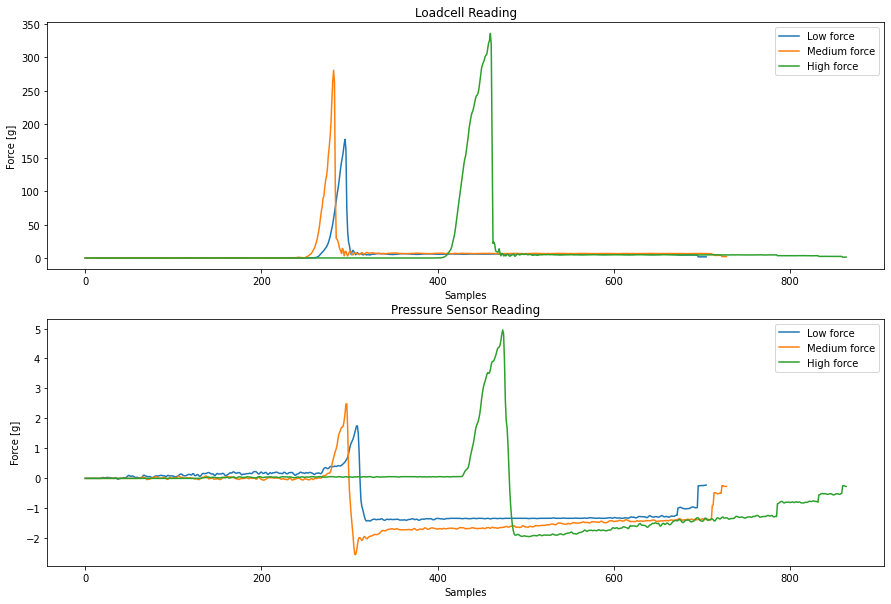

In [10]:
legend = ['Low force', 'Medium force', 'High force']

fig, axs = plt.subplots(2, 1)
fig.set_size_inches(15,10)
for i, trial in enumerate(all_means_rasp):
    axs[1].plot(range(len(trial)), trial, label=legend[i])
    axs[1].set_ylabel("Force [g]")
    axs[1].set_xlabel("Samples")
    axs[1].set_title("Pressure Sensor Reading")
    axs[1].legend(loc="upper right")

    axs[0].plot(range(len(all_means_loadcell[i])), all_means_loadcell[i], label=legend[i])
    axs[0].set_ylabel("Force [g]")
    axs[0].set_xlabel("Samples")
    axs[0].set_title("Loadcell Reading")
    axs[0].legend(loc="upper right")
   

In [11]:
lengths = []
off_stem = []
for trial in all_means_rasp:
    lengths.append(len(trial))
    dif = []
    for i,value in enumerate(trial):
        if i > 0:
            dif.append(value - trial[i-1])
    off_stem.append(dif.index(min(dif)))


begin_pull = []
for trial in all_means_loadcell:
    dif = []
    for i,value in enumerate(trial):
        if i > 0:
            dif.append(value - trial[i-1])
    begin_pull.append([dif.index(max(dif))-1,dif.index(min(dif))+1])


In [12]:
max_val = max(off_stem)
new_human_trials = []
new_trials_loadcell = []
for i, trial in enumerate(all_means_rasp):
    if i != off_stem.index(max_val):
        extra = np.array([0]*(max_val-off_stem[i]))
        new_human_trials.append(np.append(extra, trial))
        new_trials_loadcell.append(np.append(extra, all_means_loadcell[i]))
    else:
        new_human_trials.append(np.array(trial))
        new_trials_loadcell.append(np.array(all_means_loadcell[i]))


In [13]:
len(new_human_trials)

3

In [14]:
new_human_trials2 = new_human_trials[2]
new_human_trials[2] = new_human_trials[0]
new_human_trials[0] = new_human_trials2

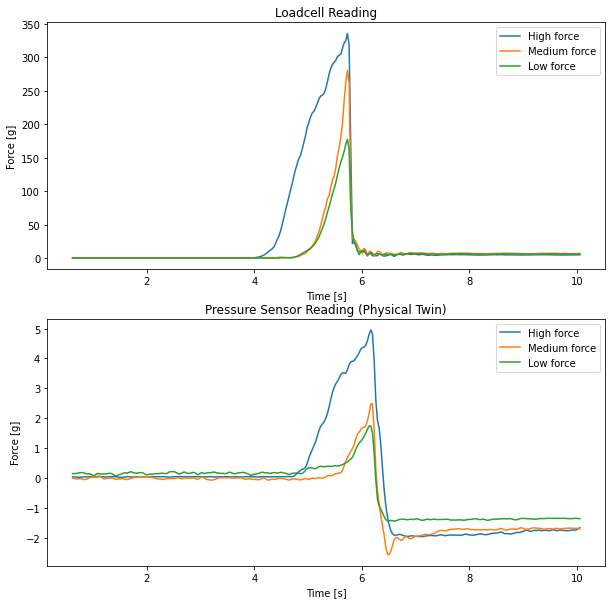

In [15]:
legend = ['High force', 'Medium force', 'Low force']
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(10,10)
for i, trial in enumerate(new_human_trials):
    axs[1].plot(all_timesL[0][0:300], trial[200+100:200+400], label=legend[i])
    axs[1].set_ylabel("Force [g]")
    axs[1].set_xlabel("Time [s]")
    axs[1].set_title("Pressure Sensor Reading (Physical Twin)")
    axs[1].legend(loc="upper right")

    axs[0].plot(all_timesL[0][0:300], new_trials_loadcell[2-i][200+100:200+400], label=legend[i])
    axs[0].set_ylabel("Force [g]")
    axs[0].set_xlabel("Time [s]")
    axs[0].set_title("Loadcell Reading")
    axs[0].legend(loc="upper right")

In [16]:
new_human_trials[0][200+100:200+400]

array([ 0.04823275,  0.049257  ,  0.044201  ,  0.03883725,  0.035688  ,
        0.04466825,  0.05293575,  0.0507175 ,  0.047008  ,  0.05093225,
        0.055417  ,  0.054178  ,  0.0448865 ,  0.03704125,  0.04488975,
        0.0542855 ,  0.056656  ,  0.05563175,  0.050939  ,  0.04701475,
        0.050939  ,  0.0556385 ,  0.05687425,  0.056871  ,  0.0555245 ,
        0.04947525,  0.039505  ,  0.0335665 ,  0.0335665 ,  0.039505  ,
        0.04947175,  0.0554105 ,  0.05541375,  0.049586  ,  0.04096225,
        0.04085475,  0.0482395 ,  0.04947525,  0.04679   ,  0.049586  ,
        0.04958925,  0.046904  ,  0.05093575,  0.0556385 ,  0.0568775 ,
        0.056985  ,  0.05698825,  0.05698825,  0.05698825,  0.05698825,
        0.05698825,  0.056985  ,  0.05687425,  0.05552775,  0.04958925,
        0.0409655 ,  0.0409655 ,  0.04958925,  0.05552775,  0.05687425,
        0.056985  ,  0.05698825,  0.05698825,  0.05698825,  0.05698825,
        0.05698825,  0.05698825,  0.05698825,  0.05698825,  0.05

In [17]:
all_timesL[0][0:300]

[0.61726,
 0.648234,
 0.679934,
 0.711178,
 0.742096,
 0.788331,
 0.819884,
 0.850773,
 0.882725,
 0.912837,
 0.94368,
 0.974048,
 1.005372,
 1.037129,
 1.068284,
 1.099393,
 1.13097,
 1.162009,
 1.192436,
 1.223576,
 1.270297,
 1.302162,
 1.347637,
 1.378496,
 1.409595,
 1.441026,
 1.471573,
 1.502156,
 1.534193,
 1.565409,
 1.59673,
 1.627199,
 1.658054,
 1.689128,
 1.721004,
 1.750924,
 1.782829,
 1.813206,
 1.845175,
 1.876108,
 1.906534,
 1.938699,
 1.970056,
 2.001325,
 2.033831,
 2.063937,
 2.094404,
 2.124553,
 2.155405,
 2.18641,
 2.217467,
 2.248903,
 2.280978,
 2.326939,
 2.358891,
 2.389776,
 2.41987,
 2.450944,
 2.482142,
 2.512751,
 2.544392,
 2.575692,
 2.606773,
 2.63783,
 2.669424,
 2.70014,
 2.731184,
 2.762515,
 2.808889,
 2.839765,
 2.870482,
 2.901341,
 2.93311,
 2.964509,
 2.996081,
 3.025953,
 3.057163,
 3.088493,
 3.119819,
 3.151316,
 3.182469,
 3.212519,
 3.243195,
 3.274527,
 3.305856,
 3.336445,
 3.367041,
 3.398309,
 3.430289,
 3.461252,
 3.508345,
 3.53916

## High Force

In [ ]:
rasp_H=[[

],[

],[

],[

],[
    
]]

In [ ]:
from time import time

In [ ]:
zeroTime = time()
count = 0
while count < 10:
    print(time() - zeroTime)
    count += 1
    

0.0009980201721191406
0.0009980201721191406
0.0009980201721191406
0.0009980201721191406
0.0009980201721191406
0.0009980201721191406
0.0009980201721191406
0.0009980201721191406
0.0009980201721191406
0.0009980201721191406


In [ ]:
a = [1,2,3,4,5,6,7]

In [ ]:
directory1 = 'D:/IST/5 ano/2 semestre/Tese/fluidic-sensor/data/human trials'
directory2 = 'D:/IST/5 ano/2 semestre/Tese/human trial stuff/human trials 2'
directory = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python'

In [ ]:
human_trials_r = []
human_trials_l = []
all_times = []
for i in range(1,6):
    # for i, trial in enumerate(os.listdir(directory))
    file_name = directory+'/human trial'+str(i)+'.txt'
    with open(file_name, 'r+') as f:
        trial_r = []
        trial_l = []
        time = []
        i = 0
        while True:
            line = f.readline()
            if not line:
                break
            if i > 3:
                if float(line[6:14]) > 0.6:
                    time.append(float(line[6:14]))
                    trial_r.append(float(line[15:35]))
                    trial_l.append(float(line[36::]))
            i += 1
    all_times.append(time)
    human_trials_r.append(trial_r)
    human_trials_l.append(trial_l)


In [ ]:
# file = open('human trial 7g - time series.txt', 'w+')
# for timeseries in all_times:
#     for t in timeseries:
#         file.write('       %f \n' % t)
#     file.write('\n\n\n\n\n')
# file.close()

In [ ]:
# file = open('human trials 7g - pressure.txt', 'w+')
# for trial in human_trials_r:
#     for t in trial:
#         file.write('       %f \n' % t)
#     file.write('\n\n\n\n\n')
# file.close()

In [ ]:
# file = open('human trials 7g - pulling.txt', 'w+')
# for trial in human_trials_l:
#     for t in trial:
#         file.write('       %f \n' % t)
#     file.write('\n\n\n\n\n')
# file.close()

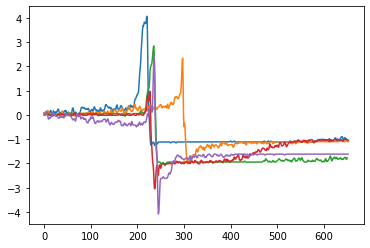

In [ ]:
for i, trial in enumerate(human_trials_r):
    # plt.plot(all_times[i], trial)
    plt.plot(range(len(trial)), trial)


284.902

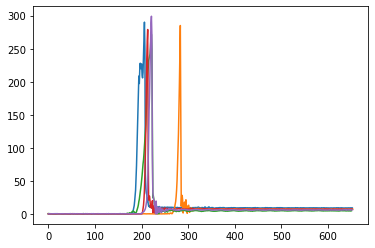

In [ ]:
sum = 0
for i, trial in enumerate(human_trials_l):
    plt.plot(range(len(trial)), trial)
    sum += np.max(trial)
sum/(i+1)


## Aligning with when the raspberry is off the stem 

In [ ]:
human_trials = human_trials_r

In [ ]:
lengths = []
off_stem = []
begin_pull = []
for trial in human_trials:
    lengths.append(len(trial))
    dif = []
    for i,value in enumerate(trial):
        if i > 0:
            dif.append(value - trial[i-1])
    off_stem.append(dif.index(min(dif)))

for trial in human_trials_l:
    dif = []
    for i,value in enumerate(trial):
        if i > 0:
            dif.append(value - trial[i-1])
    begin_pull.append([dif.index(max(dif))-1,dif.index(min(dif))+1])


In [ ]:
begin_pull2 = []
for trial in human_trials_l:
    pull = [0, 0]
    flag = False
    for i,value in enumerate(trial):
        if value > 50 and not flag:
            pull[0] = i-1
            flag = True
        elif value < 50 and flag:
            pull[1] = i+1
            break
    begin_pull2.append(pull)
        

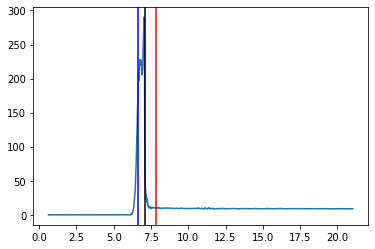

In [ ]:
i = 0
plt.plot(all_times[i], human_trials_l[i])
# only one line may be specified; full height
plt.axvline(x = all_times[i][begin_pull[i][0]], color = 'b', label = 'axvline - full height')
plt.axvline(x = all_times[i][begin_pull[i][1]], color = 'k', label = 'axvline - full height')
plt.axvline(x = all_times[i][begin_pull[i][1]+begin_pull2[i][1]-begin_pull2[i][0]], color = 'r', label = 'axvline - full height')

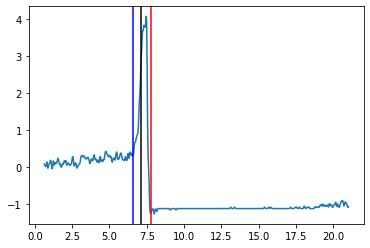

In [ ]:
i = 0
plt.plot(all_times[i], human_trials_r[i])
# only one line may be specified; full height
plt.axvline(x = all_times[i][begin_pull[i][0]], color = 'b', label = 'axvline - full height')
plt.axvline(x = all_times[i][begin_pull[i][1]], color = 'k', label = 'axvline - full height')
plt.axvline(x = all_times[i][begin_pull[i][1]+begin_pull2[i][1]-begin_pull2[i][0]], color = 'r', label = 'axvline - full height')

In [ ]:
max_val = max(off_stem)
new_human_trials = []
for i, trial in enumerate(human_trials):
    if i != off_stem.index(max_val):
        extra = np.array([0]*(max_val-off_stem[i]))
        new_human_trials.append(np.append(extra, trial))


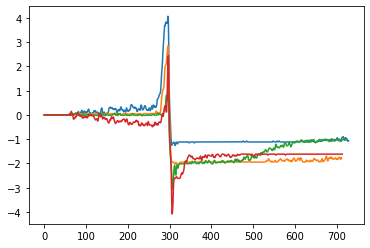

In [ ]:
minimum = 0
saved = 0
for i, trial in enumerate(new_human_trials):
    plt.plot(range(len(trial)), trial)
    newminimum = trial[-1]
    if newminimum < minimum:
        saved = i
        minimum = newminimum

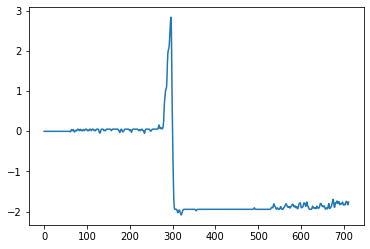

In [ ]:
plt.plot(range(len(new_human_trials[saved])), new_human_trials[saved])


Text(0, 0.5, 'Raspberry twin measurement')

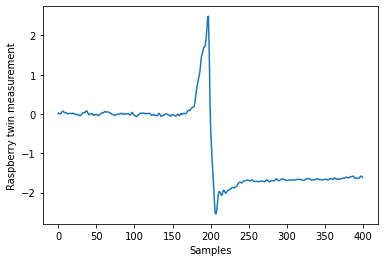

In [ ]:
longest = 0
length = 0
picking_trials = new_human_trials
for i, trial in enumerate(picking_trials):
    if len(trial) > length:
        longest = i
        length = len(trial)

for i, trial in enumerate(picking_trials):
    picking_trials[i] = np.array(trial)
    if i != longest:
        picking_trials[i] = np.append(picking_trials[i], [0]*(length-len(trial)))

trials_array = np.array([picking_trials])[0]
mean = np.mean(trials_array, axis=0)
plt.plot(range(0, mean[100:500].shape[0]), mean[100:500])
plt.xlabel('Samples')
plt.ylabel('Raspberry twin measurement')

In [ ]:
a = [6.7578958655375345, 0, 6.8911978318491265, 7.155803065184841, 7.82822201340457]
a.count(0)

1

In [ ]:
print(np.max(mean))

2.48872625


In [ ]:
mean_str =[]
# name of csv file
filename = "referenceMFTPU.csv"
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)
     
    # writing the data rows
    mean_str.append(str(x) for x in mean.tolist()[200:500])
    csvwriter.writerows(mean_str)

## Aligning with the beginning of the grasp

In [ ]:
picking = []
for trial in human_trials:
    picking.append(np.where(np.floor(np.abs(trial)) > 0)[0][0])

In [ ]:
max(picking)

688

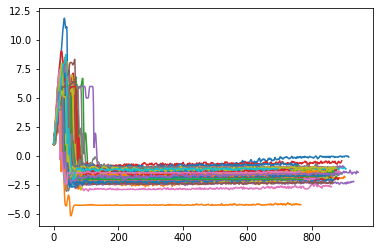

In [ ]:
picking_trials = []
for i, trial in enumerate(human_trials):
    picking_trials.append(trial[picking[i]::])
    plt.plot(range(0, len(trial)-picking[i]), picking_trials[i])
    


Text(0, 0.5, 'Raspberry twin measurement')

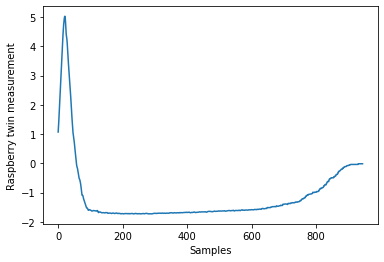

In [ ]:
longest = 0
length = 0
for i, trial in enumerate(picking_trials):
    if len(trial) > length:
        longest = i
        length = len(trial)

for i, trial in enumerate(picking_trials):
    picking_trials[i] = np.array(trial)
    if i != longest:
        picking_trials[i] = np.append(picking_trials[i], [0]*(length-len(trial)))

trials_array = np.array([picking_trials])[0]
mean = np.mean(trials_array, axis=0)
plt.plot(range(0, mean.shape[0]), mean)
plt.xlabel('Samples')
plt.ylabel('Raspberry twin measurement')

In [ ]:
mean_str =[]
saved = 0
# name of csv file
filename = "human_harvest_raspberry_4gWOBendy.csv"
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)
     
    # writing the data rows
    mean_str.append(str(x) for x in human_trials_r[saved])#[0:400])
    csvwriter.writerows(mean_str)

In [ ]:
mean_str =[]
# name of csv file
filename = "human_harvest_loadcell_4gWOBendy.csv"
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)
     
    # writing the data rows
    mean_str.append(str(x) for x in human_trials_l[saved])#[0:400])
    csvwriter.writerows(mean_str)

In [ ]:
mean_str =[]
# name of csv file
filename = "average_human_harvest_train.csv"
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)
     
    # writing the data rows
    mean_str.append(str(x) for x in mean_train.tolist())
    csvwriter.writerows(mean_str)

mean_str =[]
# name of csv file
filename = "average_human_harvest_test.csv"
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)
     
    # writing the data rows
    mean_str.append(str(x) for x in mean_test.tolist())
    csvwriter.writerows(mean_str)

In [ ]:
harvest_ref = []
rows = []
filename = "average human harvest.csv"
# reading csv file
with open(filename, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)

    # extracting each data row one by one
    for row in csvreader:
        rows.append(row)

harvest_ref = [float(x) for x in rows[0]]
np.array(harvest_ref).shape[0]

283